In [7]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Swetanshu\\Downloads\\Air filter data.csv")
print(df)

           timestamp                filter_name              location  \
0   28-08-2022 03:00  Electrostatic_Filter_Mall         Shopping Mall   
1   08-06-2023 17:00       HEPA_Filter_Hospital  Hospital Ventilation   
2   14-09-2022 05:00       HEPA_Filter_Hospital  Hospital Ventilation   
3   16-01-2021 09:00  Electrostatic_Filter_Mall         Shopping Mall   
4   01-06-2021 14:00       HEPA_Filter_Hospital  Hospital Ventilation   
5   23-04-2022 19:00   Pre_Filter_Manufacturing    Manufacturing Unit   
6   11-08-2022 00:00   Pre_Filter_Manufacturing    Manufacturing Unit   
7   30-03-2022 12:00          AHU_Filter_Office           Office HVAC   
8   30-08-2021 16:00   Pre_Filter_Manufacturing    Manufacturing Unit   
9   13-04-2021 09:00       HEPA_Filter_Hospital  Hospital Ventilation   
10  16-03-2023 08:00       HEPA_Filter_Hospital  Hospital Ventilation   
11  23-12-2022 11:00  Electrostatic_Filter_Mall         Shopping Mall   
12  06-04-2023 14:00       HEPA_Filter_Hospital  Ho

How many rows and columns are in the dataset?
What are the data types of each column?
Are there any missing values in the dataset?
What is the average filter age (filter_age_days) across all locations?
What is the maximum and minimum pressure_drop_pa recorded?
What is the most common filter class (filter_class) in the dataset?
What is the average efficiency of filters by location?
How does inlet_pm25 compare to outlet_pm25? (Check overall filtration efficiency)
What is the correlation between pressure_drop_pa and efficiency?

In [9]:
df.shape

(19, 14)

In [11]:
df.dtypes

timestamp              object
filter_name            object
location               object
filter_class           object
filter_age_days       float64
load_factor           float64
pressure_drop_pa      float64
efficiency            float64
inlet_pm25            float64
outlet_pm25           float64
inlet_pm10            float64
outlet_pm10           float64
replacement_needed      int64
hour                    int64
dtype: object

In [13]:
df.isnull().sum()

timestamp             0
filter_name           0
location              0
filter_class          0
filter_age_days       0
load_factor           0
pressure_drop_pa      0
efficiency            0
inlet_pm25            0
outlet_pm25           0
inlet_pm10            0
outlet_pm10           0
replacement_needed    0
hour                  0
dtype: int64

In [15]:
df["filter_age_days"].mean()

15.202105263157893

In [17]:
df["pressure_drop_pa"].max(),df["pressure_drop_pa"].min()

(147.6, 10.0)

In [19]:
df["filter_class"].value_counts()

filter_class
HEPA                9
Pre-Filter          5
Electrostatic       4
Activated Carbon    1
Name: count, dtype: int64

In [21]:
df.groupby("location")["efficiency"].mean()

location
Hospital Ventilation    0.968143
Manufacturing Unit      0.874400
Office HVAC             0.955000
Research Laboratory     0.874000
Shopping Mall           0.882250
Name: efficiency, dtype: float64

In [23]:
df["pm25_filtration_efficiency"] = (df["inlet_pm25"] - df["outlet_pm25"]) / df["inlet_pm25"] * 100
df["pm25_filtration_efficiency"].mean()


91.82079488767965

In [27]:
df[["pressure_drop_pa","efficiency"]].corr()

,pressure_drop_pa,efficiency
pressure_drop_pa,1.000000,0.737251
efficiency,0.737251,1.000000


How does filter efficiency change over time (timestamp)?
Does the need for replacement (replacement_needed) increase with filter age?
Show all filters that have efficiency below 80%.
Identify filters that need replacement but still have low filter_age_days.

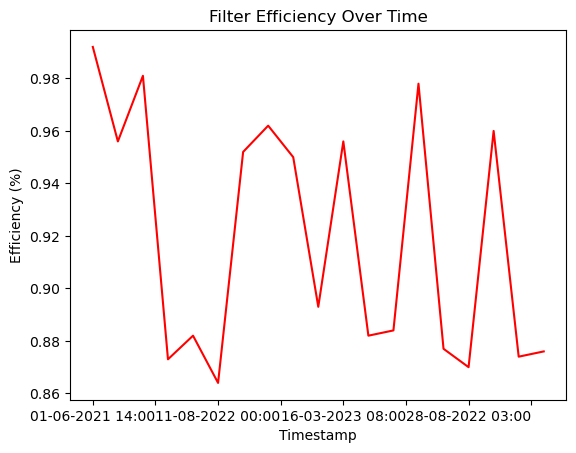

In [31]:
import matplotlib.pyplot as plt

df.groupby("timestamp")["efficiency"].mean().plot(color="red")
plt.xlabel("Timestamp")
plt.ylabel("Efficiency (%)")
plt.title("Filter Efficiency Over Time")
plt.show()

<Axes: xlabel='filter_age_days'>

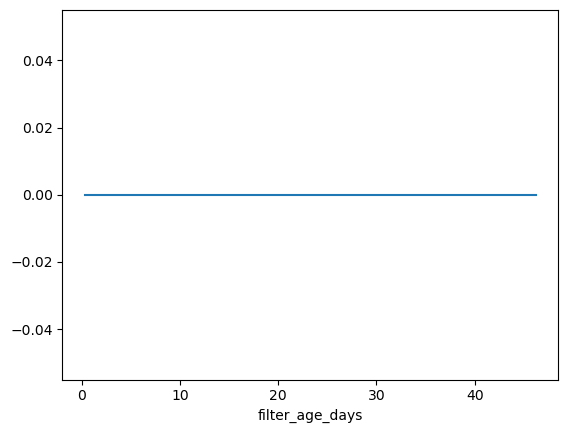

In [33]:
df.groupby("filter_age_days")["replacement_needed"].sum().plot()

In [35]:
df[df["efficiency"]<80]

,timestamp,filter_name,location,filter_class,filter_age_days,load_factor,pressure_drop_pa,efficiency,inlet_pm25,outlet_pm25,inlet_pm10,outlet_pm10,replacement_needed,hour,pm25_filtration_efficiency
0,28-08-2022 03:00,Electrostatic_Filter_Mall,Shopping Mall,Electrostatic,23.54,0.408784,60.7,0.870,47.7,6.2,88.3,11.4,0,3,87.002096
1,08-06-2023 17:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,5.46,0.309243,95.0,0.981,71.3,1.4,75.8,2.0,0,17,98.036466
2,14-09-2022 05:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,23.50,0.312394,114.9,0.962,67.4,2.6,98.9,3.8,0,5,96.142433
3,16-01-2021 09:00,Electrostatic_Filter_Mall,Shopping Mall,Electrostatic,4.04,0.420890,25.1,0.893,69.2,7.4,57.8,6.2,0,9,89.306358
4,01-06-2021 14:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,1.88,0.200000,83.7,0.992,45.3,1.0,66.4,2.0,0,14,97.792494
5,23-04-2022 19:00,Pre_Filter_Manufacturing,Manufacturing Unit,Pre-Filter,0.33,0.238988,10.0,0.882,51.9,6.1,73.3,8.6,0,19,88.246628
6,11-08-2022 00:00,Pre_Filter_Manufacturing,Manufacturing Unit,Pre-Filter,8.75,0.330701,34.5,0.864,69.8,9.5,99.5,13.5,0,0,86.389685
7,30-03-2022 12:00,AHU_Filter_Office,Office HVAC,HEPA,21.75,0.324457,133.1,0.960,67.0,2.7,102.3,4.1,0,12,95.970149
8,30-08-2021 16:00,Pre_Filter_Manufacturing,Manufacturing Unit,Pre-Filter,0.38,0.298856,28.3,0.876,54.8,6.8,90.7,11.3,0,16,87.591241
9,13-04-2021 09:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,27.21,0.372750,147.6,0.952,51.8,2.5,108.7,5.2,0,9,95.173745


In [37]:
df[(df["replacement_needed"]==1)&(df["filter_age_days"] < df["filter_age_days"].median())]

,timestamp,filter_name,location,filter_class,filter_age_days,load_factor,pressure_drop_pa,efficiency,inlet_pm25,outlet_pm25,inlet_pm10,outlet_pm10,replacement_needed,hour,pm25_filtration_efficiency
